In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from tifffile import imread
from scipy.fftpack import fft, fftshift, fftfreq
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
targetdir = '/Users/aimachine/Documents/JLMCurvature/'
y = imread('/Users/aimachine/Documents/JLMCurvature/FullResolution.tif')

520   242


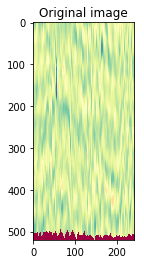

In [3]:
plt.figure()
plt.imshow(y, plt.cm.Spectral)
plt.title('Original image')
Xrange = y.shape[0]
Yrange = y.shape[1]
print(Xrange, " ", Yrange)

In [4]:
# Show the results

def plot_spectrum(ffty):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(ffty, norm=LogNorm(vmin=10))
    plt.colorbar()

In [5]:
FFTback = y
Frequ = []
for i in range(0, Xrange):
   oneD = y[i,:]
   ffty = fftshift(oneD)
   FFTback[i,:] = ffty 
   freq = fftfreq(oneD.shape[-1])
   Frequ.append(freq)  
   

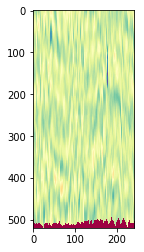

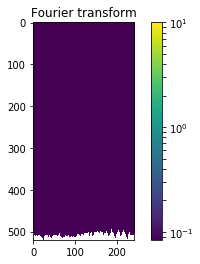

In [6]:

plt.imshow(FFTback, plt.cm.Spectral)

plt.figure()

plt.title('Fourier transform')
plot_spectrum(FFTback)


axes = 'XY'
save_tiff_imagej_compatible((targetdir + 'FFTResult.tif') , FFTback, axes)



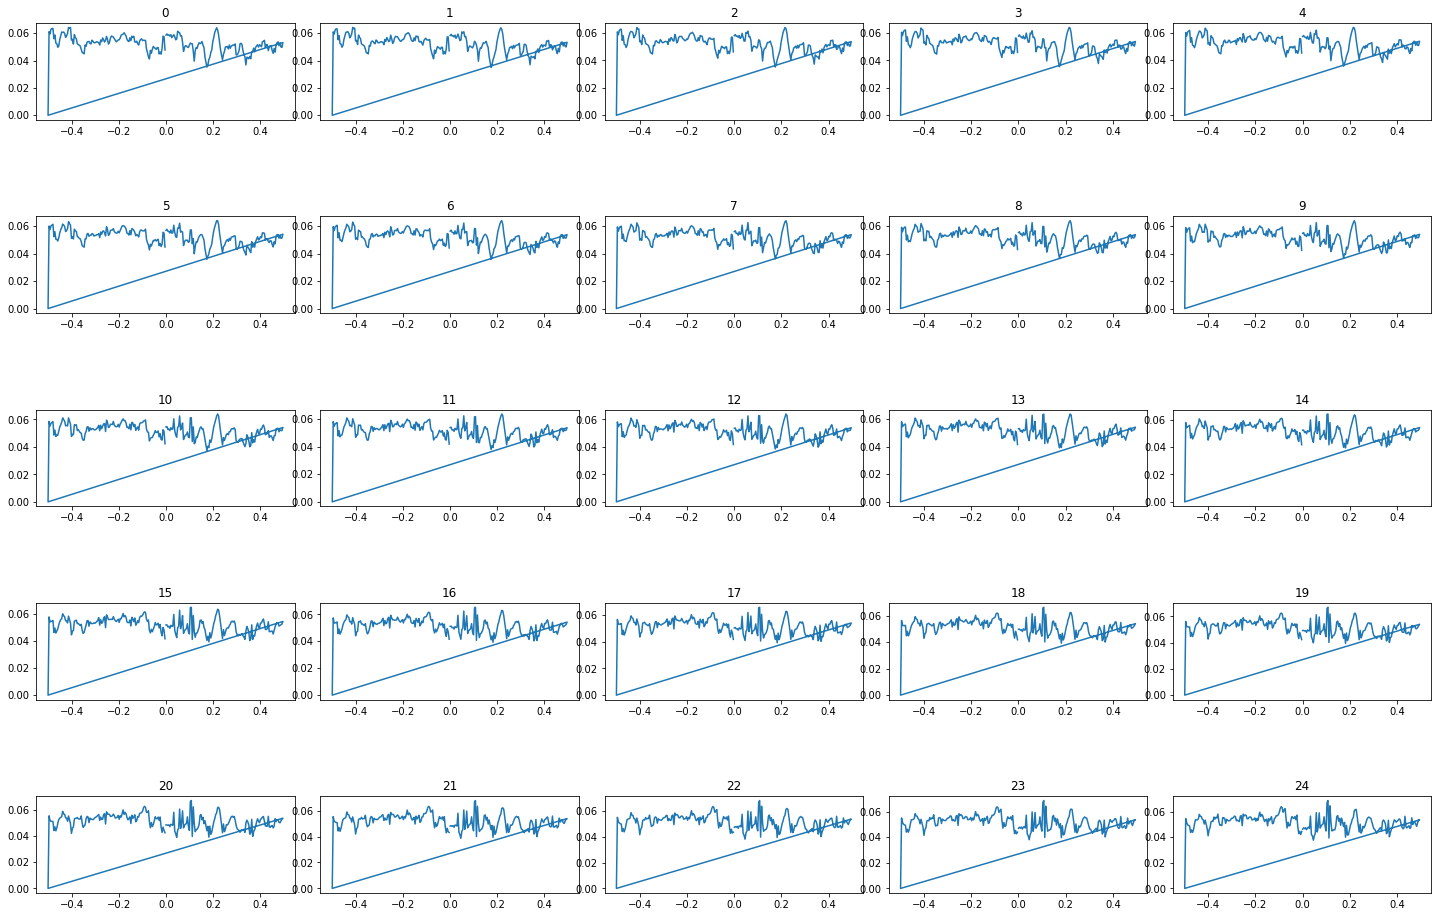

In [21]:
row = 5
column = 5
fig, axs = plt.subplots(row, column, figsize=(25, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=0.1)
axs = axs.ravel()

for i in range(0, row * column):
    
   axs[i].plot(Frequ[i],FFTback[i])
   axs[i].set_title(str(i))